Python for Data & Analytics<br>
Chapter 16, sections 7 and 8

*** requires datafile: members.csv

In [1]:
import pandas as pd
dfmembers = pd.read_csv('members.csv', parse_dates=['visitDate', 'endDate'])

FileNotFoundError: [Errno 2] No such file or directory: 'members.csv'

In [ ]:
dfmembers.head()

,guestID,visitDate,gender,age,married,pool,gym,status,endDate
0,6,2015-01-05,M,47,M,n,y,inactive,2017-08-01
1,7,2015-01-05,F,46,S,n,y,inactive,2016-11-01
2,10,2015-01-06,M,61,S,y,n,inactive,2016-12-01
3,17,2015-01-09,F,36,S,y,n,inactive,2017-01-01
4,24,2015-01-13,M,45,M,y,n,inactive,2016-09-01


In [ ]:
dfmembers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   guestID    871 non-null    int64         
 1   visitDate  871 non-null    datetime64[ns]
 2   gender     871 non-null    object        
 3   age        871 non-null    int64         
 4   married    871 non-null    object        
 5   pool       871 non-null    object        
 6   gym        871 non-null    object        
 7   status     871 non-null    object        
 8   endDate    723 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(5)
memory usage: 61.4+ KB


In [ ]:
len(dfmembers[dfmembers.status=='active'])

148

In [ ]:
import seaborn as sns

<AxesSubplot:xlabel='married', ylabel='count'>

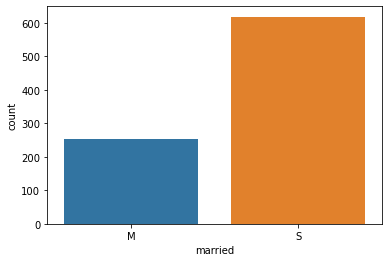

In [ ]:
sns.countplot(data=dfmembers, x='married')

<AxesSubplot:xlabel='count', ylabel='gender'>

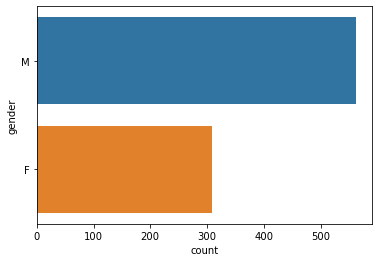

In [ ]:
sns.countplot(data=dfmembers, y='gender')

<AxesSubplot:xlabel='age', ylabel='count'>

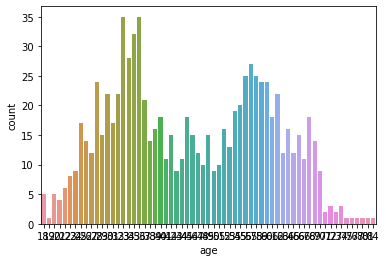

In [ ]:
sns.countplot(data=dfmembers, x='age')

<AxesSubplot:xlabel='age', ylabel='count'>

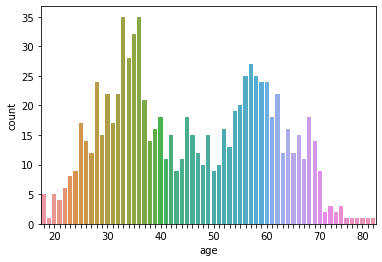

In [ ]:
import matplotlib.pyplot as plt
g = sns.countplot(data=dfmembers, x='age')
for label in g.get_xticklabels():
   visible = int(label.get_text()) % 10 == 0
   label.set_visible(visible)
g

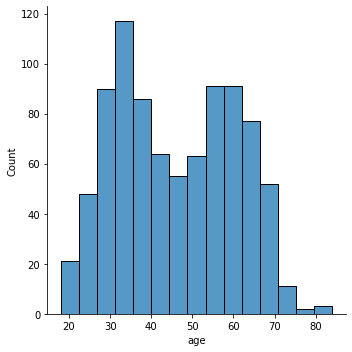

In [ ]:
sns.displot(dfmembers.age, bins=15)

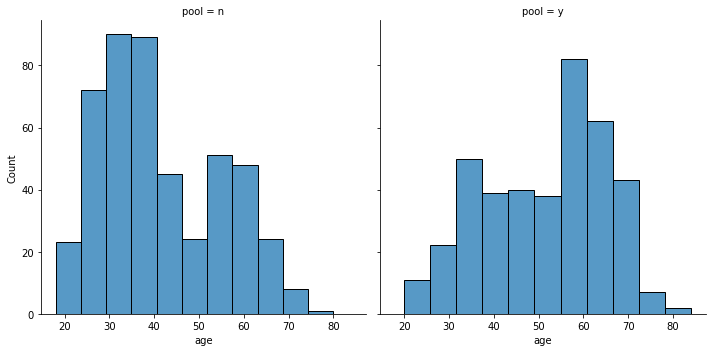

In [ ]:
g = sns.FacetGrid(dfmembers, col='pool', height=5)
g = g.map(sns.histplot, 'age')

In [ ]:
len(dfmembers[(dfmembers.gym == 'y') & (dfmembers.pool == 'y')])

0

<AxesSubplot:xlabel='visitDate', ylabel='age'>

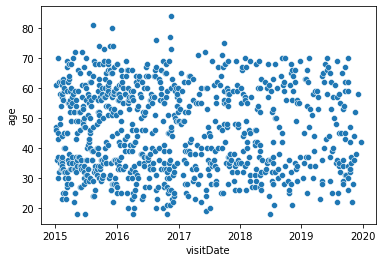

In [ ]:
sns.scatterplot(x=dfmembers.visitDate, y=dfmembers.age)

In [ ]:
dfmembers['year'] = dfmembers.visitDate.dt.year
dfmembers.head()

,guestID,visitDate,gender,age,married,pool,gym,status,endDate,year
0,6,2015-01-05,M,47,M,n,y,inactive,2017-08-01,2015
1,7,2015-01-05,F,46,S,n,y,inactive,2016-11-01,2015
2,10,2015-01-06,M,61,S,y,n,inactive,2016-12-01,2015
3,17,2015-01-09,F,36,S,y,n,inactive,2017-01-01,2015
4,24,2015-01-13,M,45,M,y,n,inactive,2016-09-01,2015


In [ ]:
dfmembers.pivot_table(values='guestID', index='year', aggfunc='count')

,guestID
year,
2015,276
2016,225
2017,142
2018,128
2019,100


In [ ]:
dfByGender = dfmembers.pivot_table(values='guestID', index='year',
                                   columns='gender', aggfunc='count')
dfByGender

gender,F,M
year,,
2015,128,148
2016,101,124
2017,38,104
2018,31,97
2019,11,89


In [ ]:
dfByGender['pctFemale'] = round(dfByGender.F /
                               (dfByGender.F + dfByGender.M) * 100)
dfByGender

gender,F,M,pctFemale
year,,,
2015,128,148,46.0
2016,101,124,45.0
2017,38,104,27.0
2018,31,97,24.0
2019,11,89,11.0


<AxesSubplot:xlabel='year', ylabel='pctFemale'>

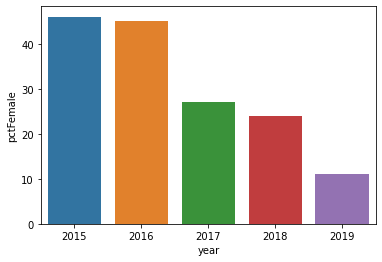

In [ ]:
sns.barplot(data=dfByGender, x=dfByGender.index, y='pctFemale')

Code from: Python for Data & Analytics, (c) 2023 Rose River Software, LLC